In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import tensorflow as tf
import os
import numpy as np
from tqdm import tqdm

In [4]:
dataset_path = "/kaggle/input/emotion-detection-fer/train"
list_items = os.listdir(dataset_path)
print("labels_encoded = ",list_items)

labels_encoded =  ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']


In [5]:
img = cv2.imread("/kaggle/input/emotion-detection-fer/train/disgusted/im10.png")
img.shape

(48, 48, 3)

In [9]:
def loader(labels_items,path):
    images = []
    labels = []
    lab = 0
    for i in tqdm(labels_items):
        folder_path = f"{path}/{i}"
        for j in os.listdir(folder_path):
            img_path = f"{folder_path}/{j}"
            image = cv2.imread(img_path)
            resized_image = cv2.resize(image,(48,48))
            images.append(resized_image)
            labels.append(lab)
        lab+=1
    return np.array(images),np.array(labels)

In [7]:
images, labels = loader(list_items,dataset_path)

100%|██████████| 7/7 [03:57<00:00, 33.92s/it]


In [10]:
base_model = tf.keras.applications.ResNet50(weights='imagenet',
                   include_top=False,
                   input_shape=(48, 48, 3))


for layer in base_model.layers:
    layer.trainable = False


model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

94765736/94765736 [==============================] - 0s 0us/step


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 27,786,119
Trainable params: 4,198,407
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=["acc"])
history=model.fit(images,labels,epochs = 100, validation_data=(images,labels))

Epoch 1/100
898/898 [==============================] - 28s 27ms/step - loss: 1.9264 - acc: 0.3187 - val_loss: 1.5991 - val_acc: 0.3808
Epoch 2/100
898/898 [==============================] - 22s 25ms/step - loss: 1.6448 - acc: 0.3554 - val_loss: 1.5044 - val_acc: 0.4315
Epoch 3/100
898/898 [==============================] - 22s 25ms/step - loss: 1.5977 - acc: 0.3678 - val_loss: 1.5123 - val_acc: 0.4262
Epoch 4/100
898/898 [==============================] - 33s 37ms/step - loss: 1.5763 - acc: 0.3803 - val_loss: 1.4305 - val_acc: 0.4636
Epoch 5/100
898/898 [==============================] - 23s 25ms/step - loss: 1.5505 - acc: 0.3853 - val_loss: 1.4027 - val_acc: 0.4615
Epoch 6/100
898/898 [==============================] - 23s 25ms/step - loss: 1.5276 - acc: 0.3887 - val_loss: 1.3695 - val_acc: 0.4746
Epoch 7/100
898/898 [==============================] - 32s 36ms/step - loss: 1.5094 - acc: 0.4026 - val_loss: 1.3372 - val_acc: 0.4876
Epoch 8/100
898/898 [==============================] - 

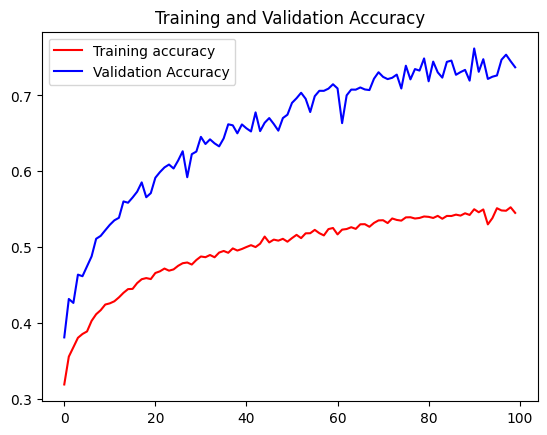

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
model.save('my_model.h5')
model

In [8]:
import cv2
import numpy as np
import torch
from torchvision.transforms import functional as F
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
model = tf.keras.models.load_model("/kaggle/input/my-model-2/my_model.h5")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2, 2, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 46,856,583
Trainable params: 4,198,407
Non-trainable params: 42,658,176
_________________________________________________________________


(48, 48, 3)


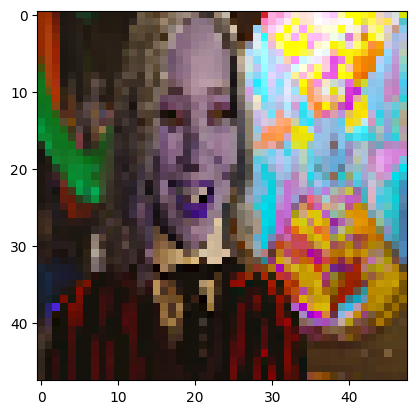

In [20]:
img1 = cv2.resize(cv2.imread("/kaggle/input/emotion-2/frames00031.png"),(48,48))
plt.imshow(img1)
print(img1.shape)

In [22]:

results01= model.predict(np.array([img1]))

1/1 [==============================] - 0s 37ms/step


In [23]:
np.argmax(results01)

4

(48, 48, 3)


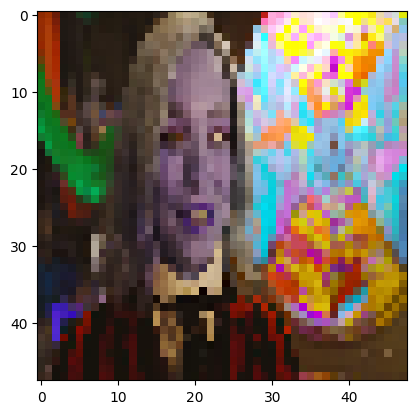

In [24]:
img2 = cv2.resize(cv2.imread("/kaggle/input/emotion-4/frames00021.png"),(48,48))
plt.imshow(img2)
print(img2.shape)

In [25]:
results02 = model.predict(np.array([img2]))

1/1 [==============================] - 0s 33ms/step


In [24]:
np.argmax(results02)

4

(48, 48, 3)


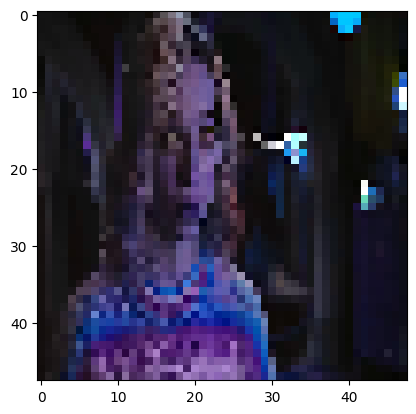

In [26]:
img4 = cv2.resize(cv2.imread("/kaggle/input/emotion-6/vlcsnap-2023-09-19-17h41m35s100.png"),(48,48))
plt.imshow(img4)
print(img4.shape)

In [26]:
results03 = model.predict(np.array([img4]))

1/1 [==============================] - 0s 25ms/step


In [27]:
np.argmax(results03)

4

(48, 48, 3)


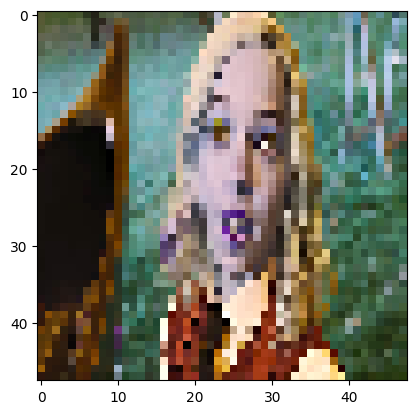

In [27]:
img5 = cv2.resize(cv2.imread("/kaggle/input/emotion-7/vlcsnap-2023-09-19-17h46m12s929.png"),(48,48))
plt.imshow(img5)
print(img5.shape)

In [29]:
results05 = model.predict(np.array([img5]))

1/1 [==============================] - 0s 35ms/step


In [31]:
np.argmax(results05)

4

(48, 48, 3)


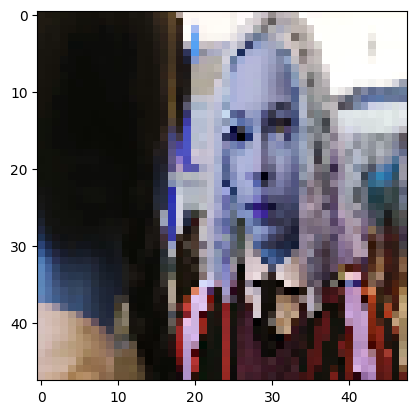

In [36]:
img6 = cv2.resize(cv2.imread("/kaggle/input/emotion-8/vlcsnap-2023-09-19-17h49m34s723.png"),(48,48))
plt.imshow(img6)
print(img6.shape)

In [37]:
results06 = model.predict(np.array([img6]))

1/1 [==============================] - 0s 26ms/step


In [38]:
np.argmax(results06)

4

(48, 48, 3)


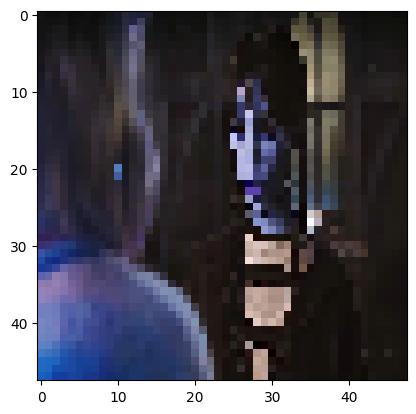

In [32]:
img7 = cv2.resize(cv2.imread("/kaggle/input/emotion-10/vlcsnap-2023-09-19-18h01m02s484.png"),(48,48))
plt.imshow(img7)
print(img7.shape)

In [33]:
results07 = model.predict(np.array([img7]))

1/1 [==============================] - 0s 34ms/step


In [34]:
np.argmax(results07)

6

(48, 48, 3)


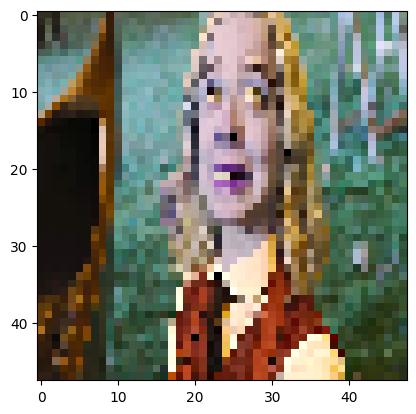

In [35]:
img9 = cv2.resize(cv2.imread("/kaggle/input/emotion-12/vlcsnap-2023-09-19-18h35m00s744.png"),(48,48))
plt.imshow(img9)
print(img9.shape)

In [36]:
results = model.predict(np.array([img9]))

1/1 [==============================] - 0s 49ms/step


In [37]:
np.argmax(results)

4

(48, 48, 3)


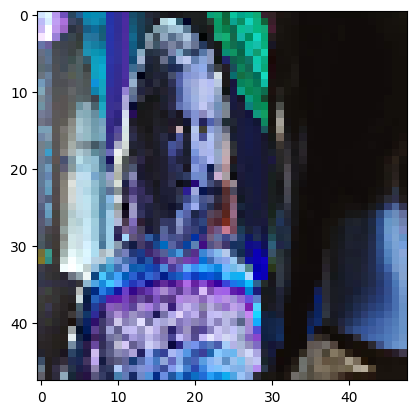

In [38]:
img10 = cv2.resize(cv2.imread("/kaggle/input/emotion-15/vlcsnap-2023-09-19-19h01m23s012.png"),(48,48))
plt.imshow(img10)
print(img10.shape)

In [13]:
np.argmax(results)

3

In [12]:
results = model.predict(np.array([img10]))

1/1 [==============================] - 12s 12s/step


(48, 48, 3)


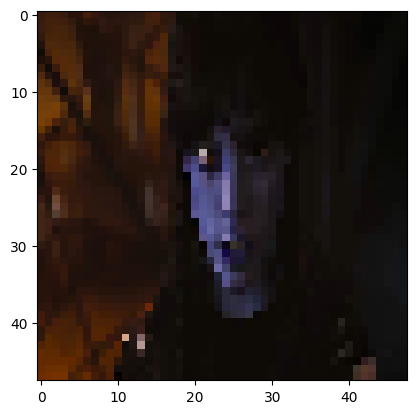

In [39]:
img11 = cv2.resize(cv2.imread("/kaggle/input/emotion-18/vlcsnap-2023-09-19-19h06m53s634.png"),(48,48))
plt.imshow(img11)
print(img11.shape)

In [42]:
np.argmax(results1)

4

In [41]:
results1 = model.predict(np.array([img11]))

1/1 [==============================] - 0s 39ms/step


(48, 48, 3)


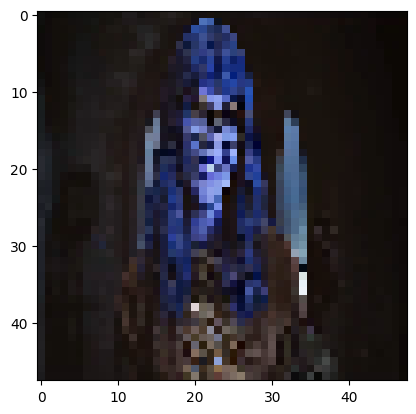

In [43]:
img19 = cv2.resize(cv2.imread("/kaggle/input/emoton-19/vlcsnap-2023-09-20-16h54m06s598.png"),(48,48))
plt.imshow(img19)
print(img19.shape)

In [44]:
results = model.predict(np.array([img19]))

1/1 [==============================] - 0s 34ms/step


In [45]:
np.argmax(results)

3

(48, 48, 3)


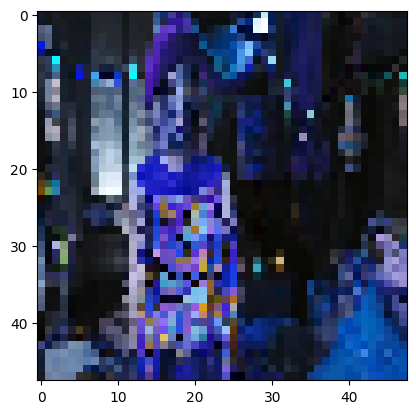

In [46]:
img21 = cv2.resize(cv2.imread("/kaggle/input/emotion-22/emotion.jpg"),(48,48))
plt.imshow(img21)
print(img21.shape)

In [47]:
results = model.predict(np.array([img21]))

1/1 [==============================] - 0s 34ms/step


In [48]:
np.argmax(results)

4

(48, 48, 3)


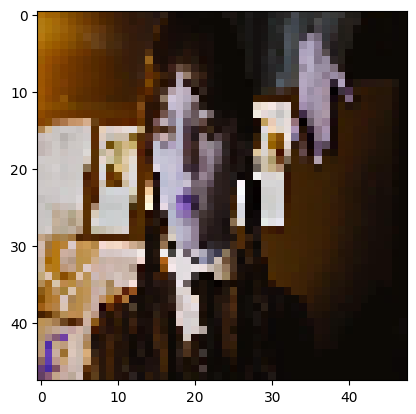

In [49]:
img22 = cv2.resize(cv2.imread("/kaggle/input/emotion-23/emotion-3.jpg"),(48,48))
plt.imshow(img22)
print(img22.shape)

In [50]:
results = model.predict(np.array([img22]))

1/1 [==============================] - 0s 34ms/step


In [51]:
np.argmax(results)

2

(48, 48, 3)


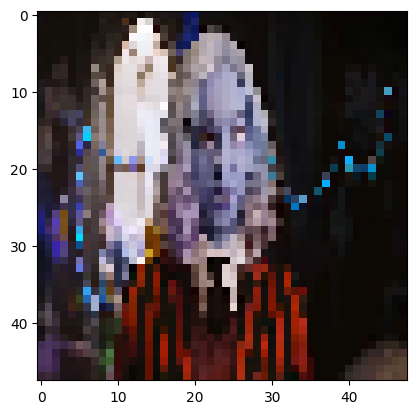

In [52]:
img32 = cv2.resize(cv2.imread("/kaggle/input/emotion-35/vlcsnap-2023-09-20-18h05m13s707.png"),(48,48))
plt.imshow(img32)
print(img32.shape)

In [53]:
results = model.predict(np.array([img32]))

np.argmax(results)

1/1 [==============================] - 0s 34ms/step


4

(48, 48, 3)


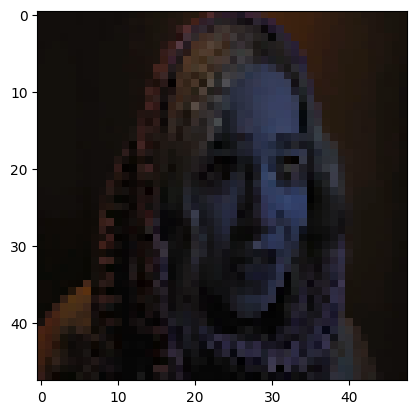

In [55]:
img34 = cv2.resize(cv2.imread("/kaggle/input/wednesday-1/wednesday.png"),(48,48))
plt.imshow(img34)
print(img34.shape)

In [56]:
results = model.predict(np.array([img34]))

1/1 [==============================] - 0s 35ms/step


In [57]:
np.argmax(results)

3

(48, 48, 3)


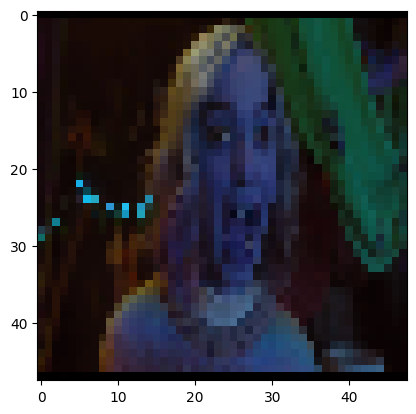

In [58]:
img35 = cv2.resize(cv2.imread("/kaggle/input/emotion-38/vlcsnap-2023-09-20-18h14m45s368.png"),(48,48))
plt.imshow(img35)
print(img35.shape)

In [59]:
results = model.predict(np.array([img35]))

1/1 [==============================] - 0s 34ms/step


In [60]:
np.argmax(results)

4